In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-csv/placement.csv


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1{
    text-align: center;
    background-color: #B983FF;
    padding: 20px;
    margin: 0;
    color: white;
    font-family: ariel;
    border-radius: 80px;
}

h2 {
    text-align: center;
    background-color: #94B3FD;
    padding: 20px;
    margin: 0;
    color: white;
    font-family: ariel;
    border-radius: 80px;
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: white;
    font-family: ariel;
    border-radius: 80px;
    border-color: #99FEFF;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

# Perceptron (Artificial Neuron)
1. A Perceptron is a single layer neural network 
2. It acts a Linear Classifier, Binary classification 
3. Loss Function : Binary Cross Entropy (-ve of Log Likelihood) 
4. Optimisation : Gradient Descent/ Stochastic Gradient Descent
To read the complete theory checkout my notes here :- https://github.com/vanshika230/Deep_Learning_and_Generative_AI


# Content in this Notebook 
1. Code for Perceptron Brute Force from scratch in python.
2. Code for Perceptron using Gradient Descent from scratch in python.
3. Implementation using sklearn. 

## Perceptron Brute Force Code
#### Algorithm Flow :- 
1. Data Generation:
Synthetic classification dataset is generated using make_classification from sklearn.datasets. Parameters like the number of samples, features, informative features, etc., are specified.
2. Visualization:
The synthetic dataset is visualized using a scatter plot, where each point represents a sample, and its color indicates the class label.
3. Perceptron Training (Brute Force):
a. The perceptron function is defined to implement the Perceptron learning algorithm.
b. Weights and bias are initialized, and gradient descent is performed for 1000 iterations.
c. For each iteration, a random sample index is selected, and predictions are made using the step activation function (predict).
e. If the prediction is incorrect, weights and bias are updated based on the learning rate and the error.
f. Finally, the intercept and coefficients of the decision boundary are returned.
4. Activation Function:
The predict function serves as the step activation function, converting the weighted sum into a binary class prediction (0 or 1).
5. Decision Boundary Visualization:
The slope and intercept of the decision boundary are calculated.
Points along the decision boundary are generated and visualized along with the dataset.

In [3]:
#import important libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset with specified parameters
# n_samples: Total number of samples to generate
# n_features: Total number of features for each sample
# n_informative: Number of informative features (i.e., features that are linear combinations of the input features)
# n_redundant: Number of redundant features (i.e., features that are random linear combinations of informative features)
# n_classes: Number of classes (binary classification in this case)
# n_clusters_per_class: Number of clusters per class (controls the tightness of clusters)
# random_state: Seed used by the random number generator for reproducibility
# hypercube: Whether to generate samples in a hypercube (if True) or a simplex (if False)
# class_sep: Separation between classes (larger values result in more separation between classes)

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

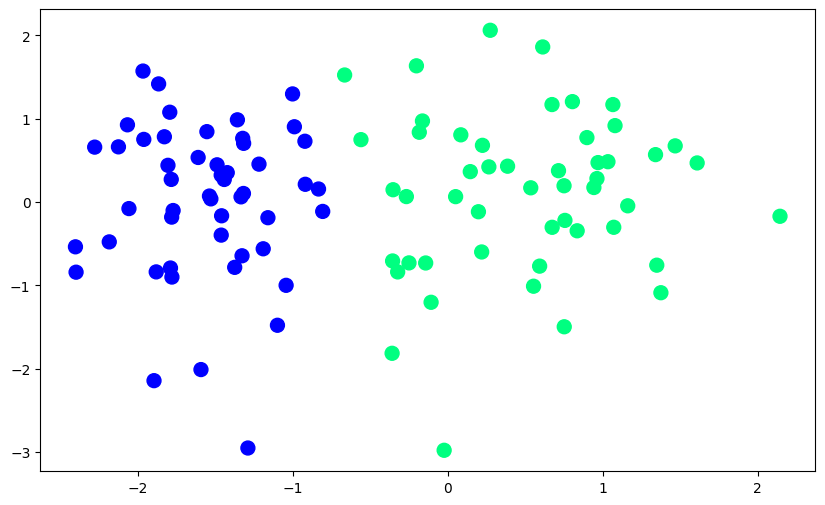

In [5]:
#let's visualize our dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [6]:
def perceptron(X, y):
    # Add bias term to feature matrix
    X_bias = np.insert(X, 0, 1, axis=1)
    
    # Initialize weights
    weights = np.ones(X_bias.shape[1])
    
    # Learning rate
    learning_rate = 0.1
    
    # Training the perceptron
    for _ in range(1000):
        # Randomly select a sample index
        idx = np.random.randint(0, len(X))
        
        # Predict class
        prediction = predict(np.dot(X_bias[idx], weights))
        
        # Update weights
        weights += learning_rate * (y[idx] - prediction) * X_bias[idx]
        
    # Return intercept and coefficients
    return weights[0], weights[1:]

In [7]:
# this is the step activation function
def predict(z):
    return 1 if z > 0 else 0

In [8]:
# Call the perceptron function to train the model and get the intercept and coefficients
intercept, coef = perceptron(X, y)

# Print the coefficients and intercept
print(coef)
print(intercept)

[1.31263269 0.19826233]
1.0


In [9]:
# Calculate slope and intercept of decision boundary
slope = -(coef[0] / coef[1])
intercept_boundary = -(intercept / coef[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = slope*x_input + intercept_boundary

(-3.0, 2.0)

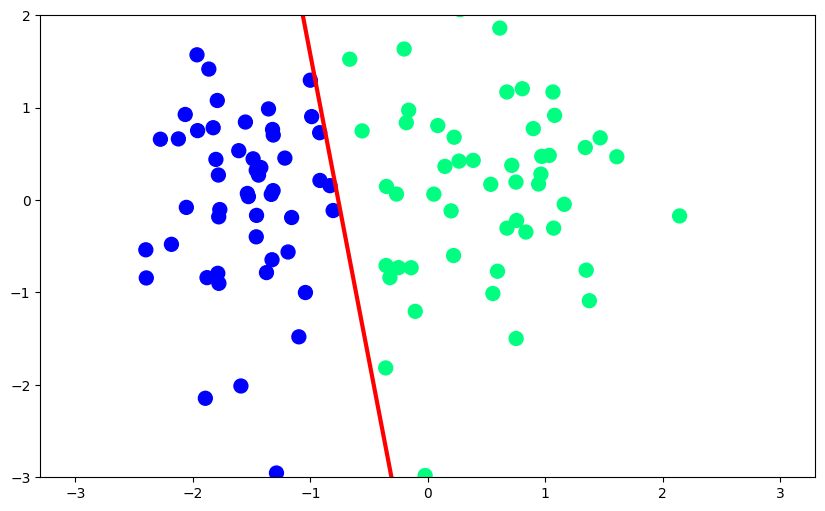

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#### Problems with Brute Force Approach in Perceptron 
1. We might get different lines with each iteration. 
2. There is a possibility that we might not be able to converge the function. 

## Perceptron Training using Gradient Descent
1. Data Preparation
Generate a synthetic dataset suitable for binary classification using parameters that ensure the data is linearly separable to an extent.

2. Initialize Parameters
a. Weights: Start with weights initialized to ones.

b. Bias: Initialize the bias term to one.

c. Learning Rate: Set a learning rate (e.g., 0.1) to control the update 
magnitude to weights during training.

3. Gradient Descent Loop
a. Epochs: Repeat the training process for a fixed number of iterations (e.g., 1000 epochs).
   For each sample in the dataset:
        --> Calculate Weighted Sum: Compute the weighted sum for the current sample by adding the dot product of weights and the sample's features to the bias.   
        --> Check for Misclassification: Determine if the current sample is misclassified by checking if the product of the actual label and the weighted sum is less than or equal to zero. 
        --> Update Weights and Bias: If misclassified, update the weights by moving towards the direction that corrects the misclassification. This is done by adding the product of the learning rate, the sample's label, and the feature values to the current weights.
        --> Similarly, update the bias by adding the product of the learning rate and the sample's label.
        
4. Calculate Decision Boundary
a. Slope: Compute the slope of the decision boundary as the negative ratio of the weights.

b. Intercept: Calculate the intercept of the decision boundary using the ratio of the bias to the weight of the second feature, negated.

5. Visualization
a. Plot Data: Scatter plot the features of the samples, color-coded by their respective labels.

b. Plot Decision Boundary: Draw the decision boundary calculated from the slope and intercept to visually assess how well the Perceptron has learned to separate the two classes

In [12]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [13]:

# Define the perceptron function
def perceptron(X, y):
    # Initialize weights and bias
    weights = np.ones(X.shape[1])
    bias = 1
    learning_rate = 0.1
    
    # Perform gradient descent
    for _ in range(1000):
        for i in range(X.shape[0]):
            # Compute the weighted sum
            weighted_sum = np.dot(X[i], weights) + bias
            
            # Check if prediction is incorrect
            if y[i] * weighted_sum <= 0:
                # Update weights and bias
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]
                
    return weights, bias

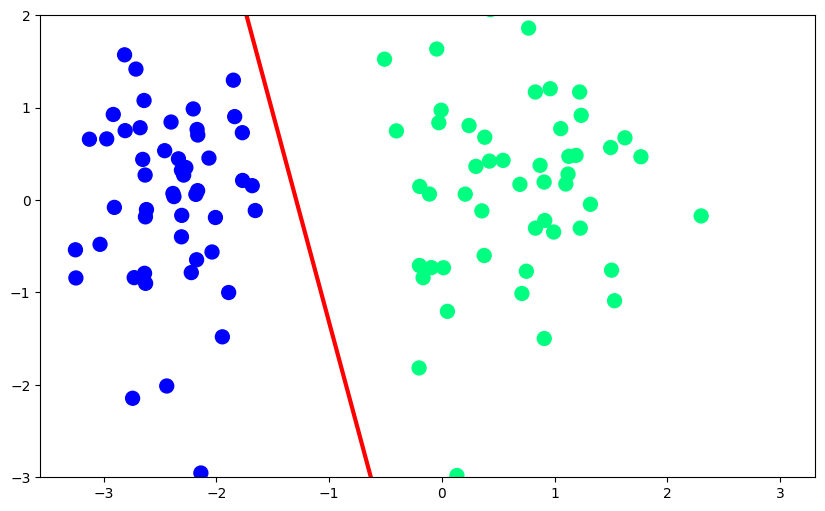

In [14]:
# Call perceptron function
weights, bias = perceptron(X, y)

# Compute slope and intercept of the decision boundary
slope = -weights[0] / weights[1]
intercept = -bias / weights[1]

# Generate x values for the decision boundary
x_values = np.linspace(-3, 3, 100)
y_values = slope * x_values + intercept

# Plot the decision boundary and dataset
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()

## Perceptron Implementation using Sklearn

In [15]:
df = pd.read_csv('/kaggle/input/placement-csv/placement.csv')

In [16]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

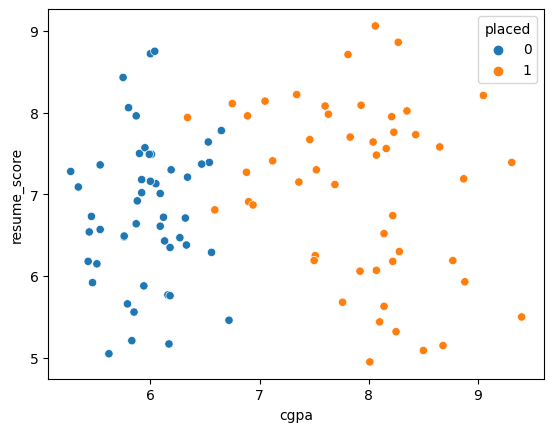

In [17]:
sns.scatterplot(data=df, x='cgpa', y='resume_score', hue='placed')

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X,y)

Perceptron()

In [20]:
p.coef_

array([[ 40.26, -36.  ]])

In [21]:
p.intercept_

array([-25.])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

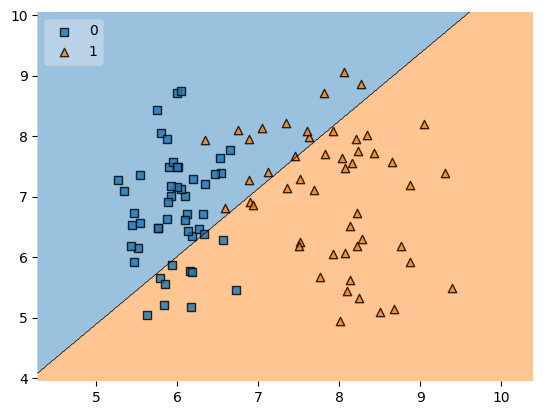

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

### Something interesting to note :- 
1. A Perceptron can behave as a logistic regression when the activation function is sigmoid and the loss function is SGD. 
2. Multiclass classification can be done when the activation function is set to softmax and the loss function is Categorical Cross Entropy.
3. A Perceptron can behave as a regression when the activation function is Linear and the loss function is MSE.

### Problems with Perceptron 
A perceptron will never converge on non-linear data. 